In [4]:
import rasterio
import rasterio.plot
import rasterio.mask

import pyproj
import numpy as np
import matplotlib.pyplot as plt

import fiona

from matplotlib import pyplot
from descartes import PolygonPatch

In [14]:
filepath_shape = 'gis/catchment.shp'
with fiona.open(filepath_shape, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]


In [22]:
print(shapes)

[{'type': 'Polygon', 'coordinates': [[(414892.68556778587, 8033127.26612146), (414921.0739741906, 8033165.11733), (414921.0739741906, 8033165.11733), (415010.97059447225, 8033167.483030533), (415209.6894393054, 8033134.363223061), (415346.9000702616, 8033098.877715056), (415491.20780281903, 8033065.757907583), (415574.00732149946, 8033001.883993173), (415659.1725407137, 8032942.74147983), (415739.60635886044, 8032845.747757947), (415739.60635886044, 8032734.559832862), (415704.1208508545, 8032606.81200404), (415635.5155353764, 8032495.624078955), (415555.0817172297, 8032431.750164544), (415410.77398467227, 8032389.167554937), (415337.4372681267, 8032422.28736241), (415264.1005515811, 8032483.7955762865), (415190.76383503556, 8032585.520699237), (415084.3073110178, 8032670.68591845), (415041.72470141074, 8032779.508143002), (415022.7990971409, 8032848.113458481), (414956.5594821965, 8032876.501864885), (414876.12566404976, 8032947.472880897), (414880.8570651172, 8033032.638100111), (414

In [18]:
filepath_raster = 'gis/samoylov_surface_classification.tif'
with rasterio.open(filepath_raster) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
     

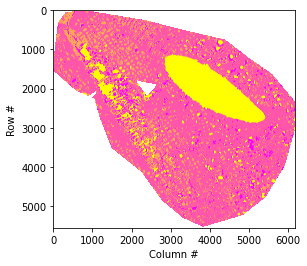

In [21]:
#mask the nan values which are defined as 255
masked_array = np.ma.masked_where(out_image[0,:,:] == 255, out_image[0,:,:])

#set colormap with masked values set to white
cmap = plt.cm.get_cmap("spring").copy()
cmap.set_bad(color='white')

#plot the raster map
plt.imshow(masked_array, cmap=cmap)
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

In [32]:
#get pixel size in [m] (coordiate system is epsg -> UTM)
pixelSizeX = out_meta['transform'][0]
pixelSizeY =-out_meta['transform'][4]

#define surface classes
surface_classes = {
  "water": 1,
  "dry": 2,
  "wet": 3,
  "submerged vegetation": 1,
}

#calculate area for each surfac class    
for key in surface_classes:
    pixel_no = np.sum((out_image[0,:,:] == surface_classes[key]))
    area = pixel_no * pixelSizeX * pixelSizeY  #surface area [m²]
    print('The area of class: ' + key + ' is: ' + str(area) + ' m²' )

The area of class: water is: 36947.23480000848 m²
The area of class: dry is: 256532.3068000589 m²
The area of class: wet is: 70092.44200001609 m²
The area of class: submerged vegetation is: 36947.23480000848 m²
